In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# C:\Users\HP\Online Payments Fraud Detection.csv(location of dataset)
df=pd.read_csv('Online Payments Fraud Detection.csv')

In [21]:
df.shape

(6362620, 11)

In [22]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [23]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [24]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

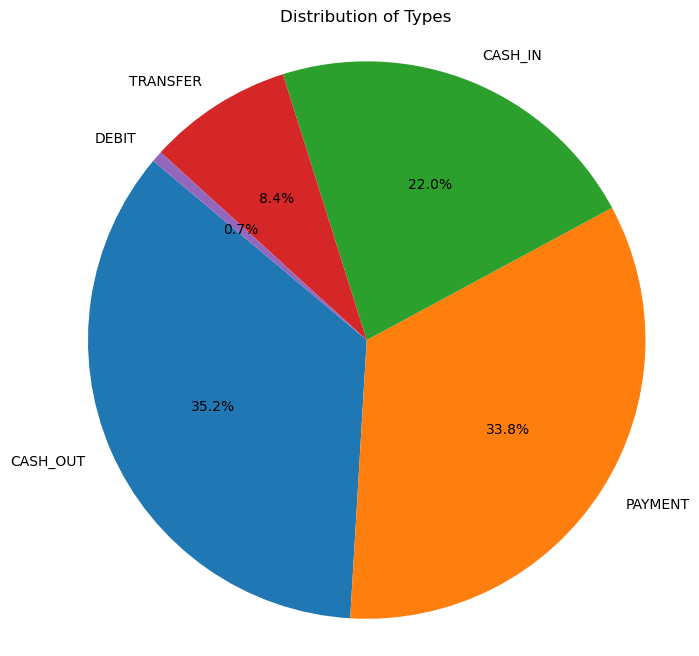

In [25]:
plt.figure(figsize=(8, 8))  
counts = df['type'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Types')
plt.axis('equal')  
plt.show()

In [26]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<AxesSubplot:>

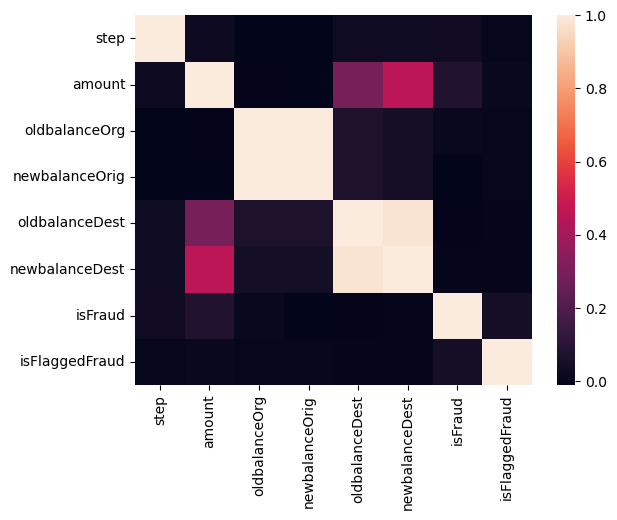

In [27]:
sns.heatmap(df.corr())

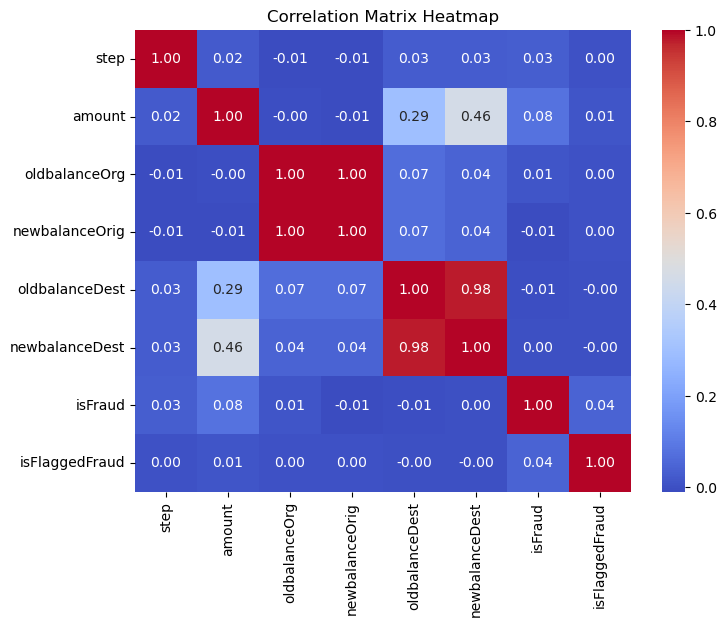

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [29]:
corr=df.corr()
corr['isFraud'].sort_values(ascending=False)

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64

In [30]:
absolute_correlation_values = corr.abs()
most_correlated = (absolute_correlation_values.where(np.triu(np.ones(absolute_correlation_values.shape), k=1).astype(bool)).stack().sort_values(ascending=False))
print("Most Correlated Features:")
print(most_correlated.head(10))

Most Correlated Features:
oldbalanceOrg   newbalanceOrig    0.998803
oldbalanceDest  newbalanceDest    0.976569
amount          newbalanceDest    0.459304
                oldbalanceDest    0.294137
                isFraud           0.076688
newbalanceOrig  oldbalanceDest    0.067812
oldbalanceOrg   oldbalanceDest    0.066243
isFraud         isFlaggedFraud    0.044109
oldbalanceOrg   newbalanceDest    0.042029
newbalanceOrig  newbalanceDest    0.041837
dtype: float64


In [31]:
df["type"] = df["type"].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})
df["isFraud"] = df["isFraud"].map({0: "No Fraud", 1: "Fraud"})

In [32]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No Fraud,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No Fraud,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No Fraud,0


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x=df[['type','amount','oldbalanceOrg','newbalanceOrig']]
y=df[['isFraud']]

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.10,random_state=42)

In [37]:
model=DecisionTreeClassifier()

In [38]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [39]:
print(model.score(x_test,y_test))

0.9993692325907672


In [46]:
a=df[df['isFraud']=='Fraud']

In [47]:
a.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,4,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,Fraud,0
3,1,1,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,Fraud,0
251,1,4,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,Fraud,0
252,1,1,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,Fraud,0
680,1,4,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,Fraud,0


In [49]:
#features = [type, amount, oldbalanceOrg, newbalanceOrig]
features = np.array([[4, 181.0, 500.0, 0.0]])
print(model.predict(features))

['Fraud']


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
